In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from google.colab import files
uploaded = files.upload()
import io
breast = load_breast_cancer()
x3 = breast.data
y3 = breast.target

Saving Housing.csv to Housing (1).csv


In [45]:
from sklearn.svm import SVR
from sklearn.decomposition import PCA
df = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))
df.head()
svar_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']

def binary_mapping(x):
    return x.map({'yes':1, 'no':0})

df[svar_list] = df[svar_list].apply(binary_mapping)

pca = PCA(n_components=1)
x_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X2 = pca.fit_transform(df[x_vars])
#print(X2)


y_vars = ['price']
Y2 = df[y_vars]

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


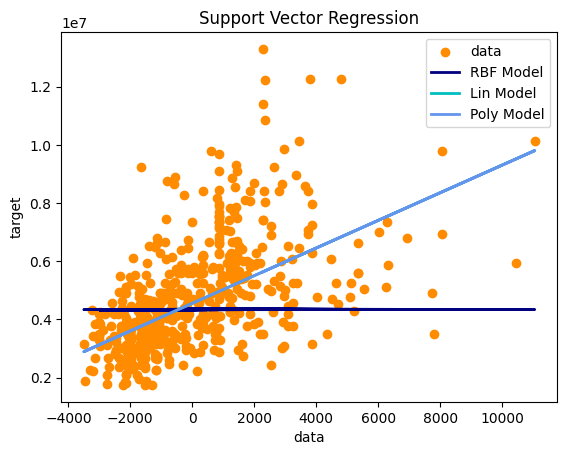

In [47]:
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma = .1)
svr_lin = SVR(kernel = 'linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree = 2)
y_rbf = svr_rbf.fit(X2,Y2).predict(X2)
y_lin = svr_lin.fit(X2,Y2).predict(X2)
y_poly = svr_lin.fit(X2,Y2).predict(X2)

lw = 2

plt.scatter(X2, Y2, color='darkorange', label='data')
plt.plot(X2, y_rbf, color='navy', lw=lw,label='RBF Model')
plt.plot(X2, y_lin, color='c', lw=lw,label='Lin Model')
plt.plot(X2, y_poly, color='cornflowerblue', lw=lw,label='Poly Model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()